In [1]:
import numpy as np
import pandas as pd

In [69]:
def load_and_clean_excel(file_path):
    df = pd.read_excel(file_path)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

> 경향 사설 

In [70]:
khan_org=load_and_clean_excel("경향신문.xlsx")

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [71]:
khan = load_and_clean_excel("경향_크롤링.xlsx")

In [72]:
# Fill NaN values in the 'URL' column with an empty string
khan['URL'] = khan['URL'].fillna('')

# Filter the DataFrame to include only rows where the 'URL' contains 'opinion'
opinion_khan = khan[khan['URL'].str.contains('opinion')]

In [73]:
len(opinion_khan)

1266

> 한겨레 사설 

In [74]:
hani_org = load_and_clean_excel("한겨레신문.xlsx")

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [75]:
hani = load_and_clean_excel("한겨레_크롤링.xlsx")

In [76]:
opinion_hani= hani[hani['URL'].str.contains('opinion')]

In [77]:
len(opinion_hani)

1203

> 조선일보 사설 

In [78]:
chosun_org = load_and_clean_excel("조선일보.xlsx")

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [79]:
chosun = load_and_clean_excel("조선일보_크롤링.xlsx")

In [80]:
opinion_chosun = chosun[chousn['URL'].str.contains('opinion')]

In [81]:
len(opinion_chosun)

1302

> 한국일보 사설 

In [82]:
hankook_org = load_and_clean_excel("한국일보.xlsx")

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [83]:
hankook = load_and_clean_excel("한국일보_크롤링.xlsx")

In [84]:
opinion_hankook = hankook[hankook['제목'].str.contains('사설|칼럼|메아리|지평성|36.5|기고')]

In [85]:
len(opinion_hankook)

724

> # 1차 텍스트 전처리 

In [86]:
# 인덱스를 재설정하여 열로 포함되지 않도록 합니다.
opinion_hankook = opinion_hankook.reset_index(drop=True)
opinion_chosun = opinion_chosun.reset_index(drop=True)
opinion_khan = opinion_khan.reset_index(drop=True)
opinion_hani = opinion_hani.reset_index(drop=True)

In [114]:
opinion = pd.concat([opinion_hankook, opinion_chosun, opinion_khan, opinion_hani], axis=0, ignore_index=True)

In [115]:
opinion

,일자,언론사,제목,URL,기사내용
0,20240513,한국일보,[정진황 칼럼] 이재명 대표 연임 짜고 치나,https://www.hankookilbo.com/News/Read/A2024051315380003838,"8월 새 대표를 뽑는 더불어민주당 전당대회를 앞두고 이재명 대표의 연임 추대론이 하루가 멀다 하고 쏟아져 나온다. ‘비명 횡사’와 ‘친명 횡재’라는 유례없는 민주당의 공천 잡음에도 과반을 넘는 거대 의석을 확보했으니 이 대표에 필적할 이가 없기는 하다. 총선 승리 후광에 경쟁자가 될 만한 이들이 공천과정에 고배를 마신 탓이다. 친문계 핵심 인사인 임종석 전 청와대 비서실장도 자신의 텃밭을 지키려다 좌절했고, 계파색이 옅고 ‘매버릭’ 이미지가 강한 박용진 전 의원 역시 수차례의 배제 룰이 적용된 끝에 공천 문턱에서 주저앉았다. 문제는 연임과 추대라는 형식이다. 전례가 없다 보니 자락을 까는 게 절체절명의 사안인 양 갖은 명분을 붙이는 게 친명계 일이다. “실익은 없고 정치적 부담만 지는 게 당대표 자리다” “안 하면 바지사장 논란이 일 것 아니냐” “대체 주자가 없다” 등 연임 논리를 설파한다. 박지원 당선자는 한술 더 떠 “당대표를 해서 대통령 후보가 되는 게 순리”라고 했다. 여론도 달가워하지 않는 상황인데 너도나도 손을 들어 '연임 호위'를 자처하는 반면, 부당성을 지적하는 당내 목소리는 들리지 않는다. 뉴시스가 의뢰한 최근 여론조사에서 중도층, 무당층의 연임 찬성은 25%에 지나지 않고, 반대 여론(47%)이 두 배에 가깝다. 어색한 건 앞뒤가 맞지 않는 합의 추대 배경이다. 이 대표의 최측근인 박찬대 원내대표는 “합의 추대는 자연스러운 흐름”이라 했다. 정청래 의원은 “본인은 말도 못 꺼내게 하면서 손사래를 치고 있지만”이라며 “정성을 다해 당대표 연임 분위기 조성에 앞장서겠다”고 했다. 반면에 직전 원내대표를 지낸 홍익표 의원은 3일 유튜브에서 대표 연임 문제와 관련해 “이 대표가 어떻게 하는 게 좋겠냐”고 물어왔다고 한다. 총선 전엔 ""한 번 더 하면 주변 사람 다 잃는다""며 연임에 부정적이었던 이 대표인지라 ‘어쩔 수 없이 맡는다’는 형식을 취하고 싶겠지만 당내에 ‘이(李)비어천가’ 분위기까지 묻어나는 건 볼썽사납다. 민주당 역사에서 대표 연임이 이루어진 건 김대중 전 대통령(DJ)의 새정치국민회의 총재 시절인 1997년 5월이다. 야권 분열로 15대 총선에서 80석도 안 되는 소수당이 된 새정치국민회의 전당대회는 15대 대선을 눈앞에 둔 상황이었다. 전당대회에선 정대철 당시 부총재와 김상현 당시 지도위 의장이 각각 대선 후보와 당 총재 자리를 놓고 DJ와 경합했다. 동교동계 중심의 1인 체제의 당 성격이었지만 그 또한 도전을 받고, 도전을 수용한 민주주의자였다. DJ는 대선 후보 경선에서 경합했던 정대철을 부총재로 지명했다. 민주당의 당헌당규상 당대표의 연임도, 추대도 하지 말라는 법도 없다. 그럼에도 '3김 시대'에나 통했을 연임이 27년 만에 부활하는 것도 마뜩잖은 일인데, 당대표 추대는 민주주의 성숙기에 있는 우리 정치에 더욱 어울리지 않는다. 대선가도에 경쟁자를 용납하지 않고, 대표를 위협하는 당내 반대 목소리는 성가시다는 뜻이 아니겠는가. 당대표 선거 판이 깔리면 당락에 상관없이 나설 인사가 줄을 이을 것이다. 가뜩이나 공천과정에서 보인 민주주의 퇴행 못지않게 총선 이후 이 대표의 절대권력화는 ‘정권 심판’과 ‘정권 교체’ 대의에 묻혀 곪아가는 민주당의 단면을 드러낸다. 22대 국회를 책임질 원내대표도 물밑 작업 끝에 이 대표 최측근을 단일 후보로 내세워 뽑더니, 국회의장마저 ‘명심’을 받는 6선의 추미애 당선자로 기우는 분위기다. 이 대표가 합의 추대로 연임에 성공한다면 세간의 뒷말처럼 ‘여의도 대통령’에 손색없는 라인업이 짜지겠으나, 민주정당으로서의 정체성 위기에 직면할 일이다."
1,20240513,한국일보,[사설] 위헌 논란에 국민 절반 반대 누굴 위한 25만 원인가,https://www.hankookilbo.com/News/Read/A2024051216030004023,"더불어민주당이 전 국민에게 25만 원씩 민생회복지원금을 지급하는 것을 22대 국회 1호 법안으로 공언한 것을 두고 위헌 논란이 뜨겁다. 정부가 추가경정예산 편성을 거부하자 특별조치법을 벼르는 것인데, 입법으로 헌법이 보장하는 정부의 예산 편성권을 무력화시키겠다는 것에 다름 아니다. 행정부 집행이나 사법부 절차를 통하지 않고 국회 입법만으로 국민에게 권리나 의무가 생기게 하는 법을 ‘처분적 법률’이라고 한다. 불특정 다수를 대상으로 보편적인 원칙을 규정하는 일반 법률과 달리 공익을 위해 불가피한 사유가 있을 때만 예외적으로 인정된다. ‘전두환 은닉재산 추징법’ ‘최순실 부정재산 환수법’ 등이 그렇다. 민주당이 밀어붙이는 특별조치법은 전 국민에게 1인당 25만 원씩 지급한다고 명시한다. 이를 위해 13조 원가량의 예산 편성과 지급 시기, 방식까지 규정한다. 헌법 제54조가 부여하는 정부의 예산 편성권, 제57조가 억제하고 있는 정부 동의 없는 국회의 예산 증액권을 침범하는 처분적 법률이라고 봐야 한다. 그러니 민주당 내에서조차 “처분적 법률을 활용할 필요가 있다”(이재명 대표)고 했다가 “특별조치법은 처분적 법률이 아니다”(진성준 정책위의장)고 오락가락한다. 이런 식이면 앞으로 총선에서 이긴 정당은 행정부의 권한을 거침없이 침범하는 아주 나쁜 선례를 남기게 된다. 25만 원의 민생지원금이 위헌 논란을 무릅써도 좋을 만큼 절체절명의 과제라 보기도 어렵다. 국가 재정이 빠듯한 상황에서 소비진작 효과는 별로 없이 가뜩이나 불안한 물가만 자극할 소지가 크다. 4대 여론조사기관의 전국지표조사(NBS)에서 찬성 응답이 46%, 반대 응답이 48%로 나오는 등 대부분 여론조사에서 찬반이 팽팽한 것만 봐도 그렇다. 돈을 주겠다는 데도 반대가 절반이 넘는다는 건 실제로는 이 정책이 국민들의 지지를 거의 받지 못하고 있다는 의미일 것이다. 그러니 도대체 누굴 위한 ‘25만 원’인지 묻지 않을 수 없다. 그저 정책 선명성을 높여 이재명 대표의, 또 민주당의 정치력을 높이겠다는 것인가. 정말 민생과 경제를 걱정한다면 이보다 효과를 극대화할 수 있는 정책을 찾아 정부의 협조를 얻어 추진하는 게 수권정당의 책임 있는 자세일 것이다."
2,20240513,한국일보,[사설] 野 '1주택자 종부세 폐지' 엇박자... 시장 혼란 야기 말아야,https://www.hankookilbo.com/News/Read/A2024051212120000361,"박찬대 더불어민주당 원내대표가 지난 8일 ""아무리 비싼 집이라도 1주택이고 실제 거주한다면 종합부동산세 과세 대상에서 빠져야 한다""는 의견을 밝혔다. 그러나 하루 만에 진성준 정책위의장이 ""당에서 관련된 정책적 검토는 없었다""고 선을 긋자, 박 원내대표는 ""종부세 완화는 국민 요구 사항이 많아 그만큼 검토가 필요하다는 것""이라며 한발 물러섰다. 종부세 완화를 둘러싼 원내 1당 지도부 간 엇박자는 시장의 혼란을 야기할 수 있는 만큼 바람직하지 않다. 종부세는 노무현 정부 때인 2005년 부동산 투기 억제를 위해 도입됐다. 그러나 문재인 정부 들어 집값과 공시가격 현실화율의 동시 상승으로 1주택 종부세 대상자가 급증했고, 이에 따른 종부세 부담이 투기와 무관한 1주택 실거주자에게 고통을 줬다는 비판이 컸다. 윤석열 정부 출범 이후 1주택자 기본공제액을 11억 원에서 12억 원으로 높이고 공시가격 현실화율을 2020년 수준으로 억제한 배경이다. 이에 2023년 1주택 종부세 대상자는 11만1,000명으로, 2022년(23만5,000명) 대비 절반 이상 줄었다. 박 원내대표 구상처럼 1주택 실거주자에게 집값에 관계없이 종부세를 면제해 준다면 형평성 논란이 불가피하다. 강남 3구에 비싼 아파트 한 채를 가진 이는 과세 대상에서 제외되는 반면, 지방에 여러 채의 저가 주택을 소유한 이들은 세금을 내야 하기 때문이다. 이른바 '똘똘한 한 채'에 대한 쏠림 현상으로 양극화가 가속화할 수도 있다. 민주당은 지난 대선에서도 일시적 다주택자의 종부세 부담 완화를 공약으로 제시한 바 있다. 문 정부의 부동산 정책

In [116]:
opinion['일자'] = pd.to_datetime(opinion['일자'], format='%Y%m%d')

opinion = opinion[~((opinion['기사내용'] == '크롤링 실패') | (opinion['기사내용'].isnull()))]

> 해석 전처리 

In [117]:
# 사용자 정의 전처리 함수

def preprocess_text(text):
    text = text.replace('윤 대통령', '대통령')
    text = text.replace('김 여사', '김건희')
    text = text.replace('더불어 민주당', '더불어민주당')
    text = text.replace('국민의 힘', '국민의힘')
    text = text.replace('조국 혁신당', '조국혁신당')
    text = text.replace('개혁 신당', '개혁신당')
    text = text.replace('이 대표', '이재명')
    text = text.replace('R&D', '연구개발')
    text = text.replace("정권심판론", "심판론")
    text = text.replace("정권안정론", "안정론")
    text = text.replace("정권 심판론", "심판론")
    text = text.replace("정권 안정론", "안정론")
    return text

In [118]:
opinion.loc[:, '기사내용'] = opinion['기사내용'].apply(preprocess_text)

> 데이터 클리닝

### (1) 이메일, url, 바이라인 제거

In [119]:
import re, unicodedata

def clean_byline(text):
    # byline
    pattern_email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_others = re.compile(r'\.([^\.]*(?:기자|특파원|교수|작가|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|▶|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    result = pattern_email.sub('', text)
    result = pattern_url.sub('', result)
    result = pattern_others.sub('.', result)

    # 본문 시작 전 꺽쇠로 쌓인 바이라인 제거
    pattern_bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    result = pattern_bracket.sub('', result).strip()

    return result

In [120]:
opinion.loc[:, '기사내용_clean'] = opinion['기사내용'].map(clean_byline)

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_38305/3033568637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion.loc[:, '기사내용_clean'] = opinion['기사내용'].map(clean_byline)


### (2) 한글 알파벳 숫자만 저장

In [121]:
def text_filter(text):
    import re
    from string import whitespace, punctuation
    punct_except_percent = ''.join([chr for chr in punctuation if chr != '%'])
    whitespace_convert_pattern = re.compile(f'[{whitespace}{punct_except_percent}]+')
    exclude_pattern = re.compile(r'[^\% 0-9a-zA-Zㄱ-ㅣ가-힣]+')

    # exclusions = exclude_pattern.findall(text)
    # print(exclusions)
    result = whitespace_convert_pattern.sub(' ', text)
    result = exclude_pattern.sub(' ', result).strip()
    result = whitespace_convert_pattern.sub(' ', result)
    return result

In [122]:
opinion.loc[:,'기사내용_clean'] =  opinion['기사내용'].map(text_filter)

In [123]:
opinion

,일자,언론사,제목,URL,기사내용,기사내용_clean
0,2024-05-13,한국일보,[정진황 칼럼] 이재명 대표 연임 짜고 치나,https://www.hankookilbo.com/News/Read/A2024051315380003838,"8월 새 대표를 뽑는 더불어민주당 전당대회를 앞두고 이재명 대표의 연임 추대론이 하루가 멀다 하고 쏟아져 나온다. ‘비명 횡사’와 ‘친명 횡재’라는 유례없는 민주당의 공천 잡음에도 과반을 넘는 거대 의석을 확보했으니 이재명에 필적할 이가 없기는 하다. 총선 승리 후광에 경쟁자가 될 만한 이들이 공천과정에 고배를 마신 탓이다. 친문계 핵심 인사인 임종석 전 청와대 비서실장도 자신의 텃밭을 지키려다 좌절했고, 계파색이 옅고 ‘매버릭’ 이미지가 강한 박용진 전 의원 역시 수차례의 배제 룰이 적용된 끝에 공천 문턱에서 주저앉았다. 문제는 연임과 추대라는 형식이다. 전례가 없다 보니 자락을 까는 게 절체절명의 사안인 양 갖은 명분을 붙이는 게 친명계 일이다. “실익은 없고 정치적 부담만 지는 게 당대표 자리다” “안 하면 바지사장 논란이 일 것 아니냐” “대체 주자가 없다” 등 연임 논리를 설파한다. 박지원 당선자는 한술 더 떠 “당대표를 해서 대통령 후보가 되는 게 순리”라고 했다. 여론도 달가워하지 않는 상황인데 너도나도 손을 들어 '연임 호위'를 자처하는 반면, 부당성을 지적하는 당내 목소리는 들리지 않는다. 뉴시스가 의뢰한 최근 여론조사에서 중도층, 무당층의 연임 찬성은 25%에 지나지 않고, 반대 여론(47%)이 두 배에 가깝다. 어색한 건 앞뒤가 맞지 않는 합의 추대 배경이다. 이재명의 최측근인 박찬대 원내대표는 “합의 추대는 자연스러운 흐름”이라 했다. 정청래 의원은 “본인은 말도 못 꺼내게 하면서 손사래를 치고 있지만”이라며 “정성을 다해 당대표 연임 분위기 조성에 앞장서겠다”고 했다. 반면에 직전 원내대표를 지낸 홍익표 의원은 3일 유튜브에서 대표 연임 문제와 관련해 “이재명가 어떻게 하는 게 좋겠냐”고 물어왔다고 한다. 총선 전엔 ""한 번 더 하면 주변 사람 다 잃는다""며 연임에 부정적이었던 이재명인지라 ‘어쩔 수 없이 맡는다’는 형식을 취하고 싶겠지만 당내에 ‘이(李)비어천가’ 분위기까지 묻어나는 건 볼썽사납다. 민주당 역사에서 대표 연임이 이루어진 건 김대중 전 대통령(DJ)의 새정치국민회의 총재 시절인 1997년 5월이다. 야권 분열로 15대 총선에서 80석도 안 되는 소수당이 된 새정치국민회의 전당대회는 15대 대선을 눈앞에 둔 상황이었다. 전당대회에선 정대철 당시 부총재와 김상현 당시 지도위 의장이 각각 대선 후보와 당 총재 자리를 놓고 DJ와 경합했다. 동교동계 중심의 1인 체제의 당 성격이었지만 그 또한 도전을 받고, 도전을 수용한 민주주의자였다. DJ는 대선 후보 경선에서 경합했던 정대철을 부총재로 지명했다. 민주당의 당헌당규상 당대표의 연임도, 추대도 하지 말라는 법도 없다. 그럼에도 '3김 시대'에나 통했을 연임이 27년 만에 부활하는 것도 마뜩잖은 일인데, 당대표 추대는 민주주의 성숙기에 있는 우리 정치에 더욱 어울리지 않는다. 대선가도에 경쟁자를 용납하지 않고, 대표를 위협하는 당내 반대 목소리는 성가시다는 뜻이 아니겠는가. 당대표 선거 판이 깔리면 당락에 상관없이 나설 인사가 줄을 이을 것이다. 가뜩이나 공천과정에서 보인 민주주의 퇴행 못지않게 총선 이후 이재명의 절대권력화는 ‘정권 심판’과 ‘정권 교체’ 대의에 묻혀 곪아가는 민주당의 단면을 드러낸다. 22대 국회를 책임질 원내대표도 물밑 작업 끝에 이재명 최측근을 단일 후보로 내세워 뽑더니, 국회의장마저 ‘명심’을 받는 6선의 추미애 당선자로 기우는 분위기다. 이재명가 합의 추대로 연임에 성공한다면 세간의 뒷말처럼 ‘여의도 대통령’에 손색없는 라인업이 짜지겠으나, 민주정당으로서의 정체성 위기에 직면할 일이다.",8월 새 대표를 뽑는 더불어민주당 전당대회를 앞두고 이재명 대표의 연임 추대론이 하루가 멀다 하고 쏟아져 나온다 비명 횡사 와 친명 횡재 라는 유례없는 민주당의 공천 잡음에도 과반을 넘는 거대 의석을 확보했으니 이재명에 필적할 이가 없기는 하다 총선 승리 후광에 경쟁자가 될 만한 이들이 공천과정에 고배를 마신 탓이다 친문계 핵심 인사인 임종석 전 청와대 비서실장도 자신의 텃밭을 지키려다 좌절했고 계파색이 옅고 매버릭 이미지가 강한 박용진 전 의원 역시 수차례의 배제 룰이 적용된 끝에 공천 문턱에서 주저앉았다 문제는 연임과 추대라는 형식이다 전례가 없다 보니 자락을 까는 게 절체절명의 사안인 양 갖은 명분을 붙이는 게 친명계 일이다 실익은 없고 정치적 부담만 지는 게 당대표 자리다 안 하면 바지사장 논란이 일 것 아니냐 대체 주자가 없다 등 연임 논리를 설파한다 박지원 당선자는 한술 더 떠 당대표를 해서 대통령 후보가 되는 게 순리 라고 했다 여론도 달가워하지 않는 상황인데 너도나도 손을 들어 연임 호위 를 자처하는 반면 부당성을 지적하는 당내 목소리는 들리지 않는다 뉴시스가 의뢰한 최근 여론조사에서 중도층 무당층의 연임 찬성은 25%에 지나지 않고 반대 여론 47% 이 두 배에 가깝다 어색한 건 앞뒤가 맞지 않는 합의 추대 배경이다 이재명의 최측근인 박찬대 원내대표는 합의 추대는 자연스러운 흐름 이라 했다 정청래 의원은 본인은 말도 못 꺼내게 하면서 손사래를 치고 있지만 이라며 정성을 다해 당대표 연임 분위기 조성에 앞장서겠다 고 했다 반면에 직전 원내대표를 지낸 홍익표 의원은 3일 유튜브에서 대표 연임 문제와 관련해 이재명가 어떻게 하는 게 좋겠냐 고 물어왔다고 한다 총선 전엔 한 번 더 하면 주변 사람 다 잃는다 며 연임에 부정적이었던 이재명인지라 어쩔 수 없이 맡는다 는 형식을 취하고 싶겠지만 당내에 이 비어천가 분위기까지 묻어나는 건 볼썽사납다 민주당 역사에서 대표 연임이 이루어진 건 김대중 전 대통령 DJ 의 새정치국민회의 총재 시절인 1997년 5월이다 야권 분열로 15대 총선에서 80석도 안 되는 소수당이 된 새정치국민회의 전당대회는 15대 대선을 눈앞에 둔 상황이었다 전당대회에선 정대철 당시 부총재와 김상현 당시 지도위 의장이 각각 대선 후보와 당 총재 자리를 놓고 DJ와 경합했다 동교동계 중심의 1인 체제의 당 성격이었지만 그 또한 도전을 받고 도전을 수용한 민주주의자였다 DJ는 대선 후보 경선에서 경합했던 정대철을 부총재로 지명했다 민주당의 당헌당규상 당대표의 연임도 추대도 하지 말라는 법도 없다 그럼에도 3김 시대 에나 통했을 연임이 27년 만에 부활하는 것도 마뜩잖은 일인데 당대표 추대는 민주주의 성숙기에 있는 우리 정치에 더욱 어울리지 않는다 대선가도에 경쟁자를 용납하지 않고 대표를 위협하는 당내 반대 목소리는 성가시다는 뜻이 아니겠는가 당대표 선거 판이 깔리면 당락에 상관없이 나설 인사가 줄을 이을 것이다 가뜩이나 공천과정에서 보인 민주주의 퇴행 못지않게 총선 이후 이재명의 절대권력화는 정권 심판 과 정권 교체 대의에 묻혀 곪아가는 민주당의 단면을 드러낸다 22대 국회를 책임질 원내대표도 물밑 작업 끝에 이재명 최측근을 단일 후보로 내세워 뽑더니 국회의장마저 명심 을 받는 6선의 추미애 당선자로 기우는 분위기다 이재명가 합의 추대로 연임에 성공한다면 세간의 뒷말처럼 여의도 대통령 에 손색없는 라인업이 짜지겠으나 민주정당으로서의 정체성 위기에 직면할 일이다
1,2024-05-13,한국일보,[사설] 위헌 논란에 국민 절반 반대 누굴 위한 25만 원인가,https://www.hankookilbo.com/News/Read/A2024051216030004023,"더불어민주당이 전 국민에게 25만 원씩 민생회복지원금을 지급하는 것을 22대 국회 1호 법안으로 공언한 것을 두고 위헌 논란이 뜨겁다. 정부가 추가경정예산 편성을 거부하자 특별조치법을 벼르는 것인데, 입법으로 헌법이 보장하는 정부의 예산 편성권을 무력화시키겠다는 것에 다름 아니다. 행정부 집행이나 사법부 절차를 통하지 않고 국회 입법만으로 국민에게 권리나 의무가 생기게 하는 법을 ‘처분적 법률’이라고 한다. 불특정 다수를 대상으로 보편적인 원칙을 규정하는 일반 법률과 달리 공익을 위해 불가피한 사유가 있을 때만 예외적으

> # 2차 품사 태깅 및 불용어 제거

In [95]:
# 불용어 리스트
with open('stopword.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
stop_words = [word.strip() for word in stop_words]
stop_words = stop_words + ['수','말','전']

In [153]:
stop_words 

['않다',
 '되어다',
 '되다',
 '하다',
 '어떻다',
 '이렇다',
 '이다',
 '어제',
 '매일',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼

In [97]:
from konlpy.tag import Okt
okt = Okt()

In [98]:
import konlpy
import os

# konlpy 패키지가 설치된 경로 확인
konlpy_path = os.path.dirname(konlpy.__file__)
print("Konlpy 경로:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy


In [100]:
!jar xvf open-korean-text-2.1.0.jar

java.io.FileNotFoundException: open-korean-text-2.1.0.jar (No such file or directory)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:213)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:152)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:106)
	at jdk.jartool/sun.tools.jar.Main.run(Main.java:394)
	at jdk.jartool/sun.tools.jar.Main.main(Main.java:1708)


In [101]:
import os
import urllib.request

# Konlpy 패키지가 설치된 경로
konlpy_path = '/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java'
print("Konlpy 경로:", konlpy_path)

# 변경할 경로
if os.path.exists(konlpy_path):
    os.chdir(konlpy_path)
    print("경로 변경 성공:", os.getcwd())
    
    # JAR 파일 다운로드
    jar_url = "https://github.com/open-korean-text/open-korean-text/releases/download/2.1.0/open-korean-text-2.1.0.jar"
    jar_file = "open-korean-text-2.1.0.jar"
    
    # 파일이 이미 존재하지 않는 경우 다운로드
    if not os.path.exists(jar_file):
        print(f"{jar_file} 다운로드 중...")
        urllib.request.urlretrieve(jar_url, jar_file)
        print(f"{jar_file} 다운로드 완료.")
    else:
        print(f"{jar_file} 파일이 이미 존재합니다.")
else:
    print("경로가 존재하지 않습니다:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
경로 변경 성공: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
open-korean-text-2.1.0.jar 파일이 이미 존재합니다.


In [102]:
import os

# Konlpy 패키지가 설치된 경로
konlpy_path = '/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java'
print("Konlpy 경로:", konlpy_path)

# 변경할 경로
if os.path.exists(konlpy_path):
    os.chdir(konlpy_path)
    print("경로 변경 성공:", os.getcwd())
    
    # 현재 디렉토리의 파일 목록 확인
    files = os.listdir()
    print("현재 디렉토리의 파일 목록:", files)
    
    # Jar 파일 추출
    jar_file = 'open-korean-text-2.1.0.jar'
    if jar_file in files:
        result = os.system(f'jar xvf {jar_file}')
        if result == 0:
            print(f"{jar_file} 파일 추출 성공.")
        else:
            print(f"{jar_file} 파일 추출 실패.")
    else:
        print(f"{jar_file} 파일이 존재하지 않습니다.")
else:
    print("경로가 존재하지 않습니다:", konlpy_path)

Konlpy 경로: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
경로 변경 성공: /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java
현재 디렉토리의 파일 목록: ['scala-library-2.12.3.jar', 'twitter-text-1.14.7.jar', 'komoran-3.0.jar', 'jhannanum-0.8.4.jar', 'open-korean-text-2.1.0.jar', 'bin', 'aho-corasick.jar', 'org', 'kkma-2.0.jar', 'META-INF', 'shineware-common-1.0.jar', 'snakeyaml-1.12.jar', 'data', 'conf', 'shineware-ds-1.0.jar']
  생성됨: META-INF/
 증가됨: META-INF/MANIFEST.MF
  생성됨: org/
  생성됨: org/openkoreantext/
  생성됨: org/openkoreantext/processor/
 증가됨: org/openkoreantext/processor/KoreanPosJava.class
 증가됨: org/openkoreantext/processor/KoreanTokenJava.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor$.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class
  생성됨: org/openkoreantext/processor/normalizer/
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$.c

In [103]:
# names.txt 파일 경로
names_file = 'org/openkoreantext/processor/util/noun/names.txt'
if os.path.exists(names_file):
    with open(names_file, 'r', encoding='utf-8') as f:
        data = f.read()
    print("기존 데이터:\n", data)

기존 데이터:
 가몽
가온
갓세븐
강새이
게임닉가
관우
귀여미
규
김유이
김준면
까까런
노컷
누너예
니노
다마고치
다이무스
대학생
데이브
도요토미
동운
동이
두주니
디시인사이드
디오
라몹
라스
라옵
멍구
메이든
명덕
명량
문민정부
미네
방엘리
병헌
붓다
비정상회담
빼빼로
삼풍
샤인온미
성식
성열
세라문
세라복
세종대왕
손권
손책
쇼미더머니
쇼챔
순규
스라소니
신동아
신쓰패밀리
신아라
아베
안상홍
안홍준
여누
여랑
여포
연합
오꾸닭
요섭
웃찾사
원식
유병언
유비
유이
윤기형
이나단
이명박
이완용
임창용
자괴
자니윤
자대련
자유
재중이
전교조
정윤회
제갈량
조자룡
조조
준면
지오디
지존파
진영오
차작가
차트
창섭
챠트
첸
코르사주
하무열
하용파쿠
혁재
현이
현태
혜미
조국혁신당
개혁신당
국민의힘
심판론
안정론
연구개발
윤정부
더불어민주당



- 새로운 단어 추가를 위한 함수 

In [104]:
import os

def add_custom_words(new_words):
    # Konlpy 패키지가 설치된 경로
    konlpy_path = '/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java'
    names_file = os.path.join(konlpy_path, 'org/openkoreantext/processor/util/noun/names.txt')
    
    if os.path.exists(names_file):
        # 기존 데이터 읽기
        with open(names_file, 'r', encoding='utf-8') as f:
            data = f.read()
        print("기존 데이터:\n", data)
        
        # 새 단어 추가
        for word in new_words:
            if word not in data:
                data += word + '\n'
        
        # 사전 저장
        with open(names_file, 'w', encoding='utf-8') as f:
            f.write(data)
        print("새 단어가 추가되었습니다:\n", new_words)
    else:
        print(f"{names_file} 파일을 찾을 수 없습니다.")

In [105]:
new_words = ["국힘","민주당"]
add_custom_words(new_words)

기존 데이터:
 가몽
가온
갓세븐
강새이
게임닉가
관우
귀여미
규
김유이
김준면
까까런
노컷
누너예
니노
다마고치
다이무스
대학생
데이브
도요토미
동운
동이
두주니
디시인사이드
디오
라몹
라스
라옵
멍구
메이든
명덕
명량
문민정부
미네
방엘리
병헌
붓다
비정상회담
빼빼로
삼풍
샤인온미
성식
성열
세라문
세라복
세종대왕
손권
손책
쇼미더머니
쇼챔
순규
스라소니
신동아
신쓰패밀리
신아라
아베
안상홍
안홍준
여누
여랑
여포
연합
오꾸닭
요섭
웃찾사
원식
유병언
유비
유이
윤기형
이나단
이명박
이완용
임창용
자괴
자니윤
자대련
자유
재중이
전교조
정윤회
제갈량
조자룡
조조
준면
지오디
지존파
진영오
차작가
차트
창섭
챠트
첸
코르사주
하무열
하용파쿠
혁재
현이
현태
혜미
조국혁신당
개혁신당
국민의힘
심판론
안정론
연구개발
윤정부
더불어민주당

새 단어가 추가되었습니다:
 ['국힘', '민주당']


In [124]:
!cd /Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/konlpy/java && jar xvf open-korean-text-2.1.0.jar && jar cvf open-korean-text-2.1.0.jar org

  생성됨: META-INF/
 증가됨: META-INF/MANIFEST.MF
  생성됨: org/
  생성됨: org/openkoreantext/
  생성됨: org/openkoreantext/processor/
 증가됨: org/openkoreantext/processor/KoreanPosJava.class
 증가됨: org/openkoreantext/processor/KoreanTokenJava.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor$.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessor.class
 증가됨: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class
  생성됨: org/openkoreantext/processor/normalizer/
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment$.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment.class
 증가됨: org/openkoreantext/processor/normalizer/KoreanNormalizer.class
  생성됨: org/openkoreantext/processor/phrase_extractor/
 증가됨: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$.class
 증가됨: org/openkoreantext/processor/phrase_extractor/KoreanPhraseExtractor$KoreanPhrase$.cla

 증가됨: org/openkoreantext/processor/util/josa/josa.txt
  생성됨: org/openkoreantext/processor/util/noun/
 증가됨: org/openkoreantext/processor/util/noun/bible.txt
 증가됨: org/openkoreantext/processor/util/noun/company_names.txt
 증가됨: org/openkoreantext/processor/util/noun/congress.txt
 증가됨: org/openkoreantext/processor/util/noun/entities.txt
 증가됨: org/openkoreantext/processor/util/noun/foreign.txt
 증가됨: org/openkoreantext/processor/util/noun/geolocations.txt
 증가됨: org/openkoreantext/processor/util/noun/kpop.txt
 증가됨: org/openkoreantext/processor/util/noun/lol.txt
 증가됨: org/openkoreantext/processor/util/noun/names.txt
 증가됨: org/openkoreantext/processor/util/noun/nouns.txt
 증가됨: org/openkoreantext/processor/util/noun/pokemon.txt
 증가됨: org/openkoreantext/processor/util/noun/profane.txt
 증가됨: org/openkoreantext/processor/util/noun/slangs.txt
 증가됨: org/openkoreantext/processor/util/noun/spam.txt
 증가됨: org/openkoreantext/processor/util/noun/twitter.txt
 증가됨: org/openkoreantext/processor/util/noun/wik

추가하는 중: org/openkoreantext/processor/util/example_chunks.txt(입력 = 522978) (출력 = 163253)(68%를 감소함)
추가하는 중: org/openkoreantext/processor/util/example_tweets.txt(입력 = 86271) (출력 = 38336)(55%를 감소함)
추가하는 중: org/openkoreantext/processor/util/freq/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/util/freq/entity-freq.txt.gz(입력 = 385753) (출력 = 385873)(0%를 감소함)
추가하는 중: org/openkoreantext/processor/util/josa/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/util/josa/josa.txt(입력 = 5219) (출력 = 1476)(71%를 감소함)
추가하는 중: org/openkoreantext/processor/util/noun/(입력 = 0) (출력 = 0)(0%를 저장함)
추가하는 중: org/openkoreantext/processor/util/noun/bible.txt(입력 = 2032) (출력 = 1005)(50%를 감소함)
추가하는 중: org/openkoreantext/processor/util/noun/company_names.txt(입력 = 1631) (출력 = 905)(44%를 감소함)
추가하는 중: org/openkoreantext/processor/util/noun/congress.txt(입력 = 26494) (출력 = 9351)(64%를 감소함)
추가하는 중: org/openkoreantext/processor/util/noun/entities.txt(입력 = 108142) (출력 = 44095)(59%를 감소함)
추가하는 중: org/open

> # 진보/보수 분류

In [215]:
cutoff_date = pd.to_datetime('2024-04-09')
opinion_classification = opinion[opinion['일자'] <= cutoff_date]

In [157]:
# 언론사 성향에 따른 새로운 열 추가
def classify_newspaper(publisher):
    if publisher in ['한국일보', '조선일보']:
        return 1
    elif publisher in ['한겨레', '경향신문']:
        return 0
    else:
        return None

opinion_classification['성향'] = opinion_classification['언론사'].apply(classify_newspaper)

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_38305/1858651737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_classification['성향'] = opinion_classification['언론사'].apply(classify_newspaper)


In [158]:
opinion_classification.groupby('성향')['언론사'].value_counts()

성향  언론사 
0   경향신문    1263
    한겨레     1018
1   조선일보    1245
    한국일보     646
Name: count, dtype: int64

In [159]:
opinion_classification.head()

,일자,언론사,제목,URL,기사내용,기사내용_clean,성향
78,2024-04-09,한국일보,[사설] 아직 격전지 50곳... 중도층의 '한 표' 중요성 커졌다,https://www.hankookilbo.com/News/Read/A2024040814270002935,"4·10 총선 레이스가 여론조사 공표금지 ‘깜깜이 기간’에 들어간 가운데 투표일을 하루 앞둔 현재, 전국 주요 격전지 표심이 승부를 가를 것으로 보인다. 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다. 정치권에선 50곳 정도를 지목하고 있는데, 지지도 ‘5% 이내’의 초접전 양상을 보이는 지역구들이다. 여야 모두 막판 격전지가 늘고 있다고 보고, 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다. 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다. 구체적으로 여론조사상 1·2위가 엎치락뒤치락하는 서울·수도권 격전지의 사전투표율은 유독 높았다. 서울 종로구(36.07%)·동작구(35.84%)·용산구(34.31%)·광진구(33.55%)·성동구(33.14) 등 ‘한강벨트’가 전국 평균(31.28%)을 웃돌아 비상한 관심도가 증명됐다. 성남분당구도 평균 이상인 33.87%를 기록, 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다. 여야 모두 ‘상대방 심판론’이 작동했다고 주장하고 있다. 결국 초박빙 지역의 유권자는 다른 지역보다 ‘내 한 표’의 파장이 훨씬 크다는 결론이 나온다. 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1, 2개 동에서 승부가 나는 격이다. 한 표의 막중한 무게감을 직시할 필요가 있는 것이다. 10석이 걸린 ‘낙동강 전선’도 전체 판을 좌우할 승부처로 꼽힌다. 격전지 선거구민과 중도층은 총선의 ‘심판자 중 심판자’가 될 것이다. 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다. 최선이 없으면 차선, 그것도 아니면 ‘차악’을 택해야 한다. 국익과 정치발전에 어느 후보, 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다. 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다. 특히 여야 영호남 ‘텃밭’ 유권자들은 ‘지역이기주의’에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다.",4 10 총선 레이스가 여론조사 공표금지 깜깜이 기간 에 들어간 가운데 투표일을 하루 앞둔 현재 전국 주요 격전지 표심이 승부를 가를 것으로 보인다 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다 정치권에선 50곳 정도를 지목하고 있는데 지지도 5% 이내 의 초접전 양상을 보이는 지역구들이다 여야 모두 막판 격전지가 늘고 있다고 보고 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다 구체적으로 여론조사상 1 2위가 엎치락뒤치락하는 서울 수도권 격전지의 사전투표율은 유독 높았다 서울 종로구 36 07% 동작구 35 84% 용산구 34 31% 광진구 33 55% 성동구 33 14 등 한강벨트 가 전국 평균 31 28% 을 웃돌아 비상한 관심도가 증명됐다 성남분당구도 평균 이상인 33 87%를 기록 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다 여야 모두 상대방 심판론 이 작동했다고 주장하고 있다 결국 초박빙 지역의 유권자는 다른 지역보다 내 한 표 의 파장이 훨씬 크다는 결론이 나온다 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1 2개 동에서 승부가 나는 격이다 한 표의 막중한 무게감을 직시할 필요가 있는 것이다 10석이 걸린 낙동강 전선 도 전체 판을 좌우할 승부처로 꼽힌다 격전지 선거구민과 중도층은 총선의 심판자 중 심판자 가 될 것이다 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다 최선이 없으면 차선 그것도 아니면 차악 을 택해야 한다 국익과 정치발전에 어느 후보 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다 특히 여야 영호남 텃밭 유권자들은 지역이기주의 에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다,1
79,2024-04-08,한국일보,[김희원 칼럼] 심판만으로 세상을 바꿀 수 없다,https://www.hankookilbo.com/News/Read/A2024040812200002767,"비호감 대통령 선거에 이어 심판론 가득한 총선이다. '심판론'에 기이하게 '이재명·조국 심판'이 맞섰다. 이재명 더불어민주당 대표는 “회초리를 들어서 안 되면 권력을 빼앗아야 한다”고 수위를 높였고 한동훈 국민의힘 비대위원장은 “정부가 전복되고 혼란스러운 상황이 오길 바라냐”고 다그쳤다. 결과는 뚜껑을 열어봐야 알지만 역대 총선 최고의 사전투표율(31.28%)이 심상찮다. 더 상징적인 장면은 조국혁신당 돌풍이다. 비례 투표 지지율 30.3%, 오차범위 내 1위(리얼미터 2~3일 조사)로 치솟았다. 4·10 총선은 문재인 정권을 심판한 윤석열 정권을 심판하는 조국의 선거가 돼 버렸다. 이 심판의 악순환이 서글프다. 유권자들이 패배를 안기려는 이유는 넘쳐나지만 그렇게 승리한 쪽이 더 나은 세상을 만들었는지는 의문이다. 많은 국민이 반(反)문재인 기치에 이끌려 정치 경험이 전무한 신인, 숱한 설화와 무속 논란을 일으켰던 윤석열 대통령을 뽑았다. 그러고선 지금 의대 정원 2,000명 증원을 고집하다 해결하지 못하는 무능력에, 물가고에 공감은커녕 “합리적” 대파 운운하는 무감각에 실망하고 있다. 법치와 공정을 내세워 당선돼 놓고는 수사 외압 피의자를 대사로 빼돌린 대통령의 내로남불에 분노하고 있다. 민주당은 나을까. 180석의 민주당이 21대 국회에서 한 일은 검수완박 입법, 상임위원장 독식이었다. 방송 3법을 외면하다가 공허히 정권의 공영방송 장악을 비판하고, 노란봉투법은 뒤늦게 통과시켰다가 대통령 거부권으로 좌초했으며, 차별금지법은 쳐다보지도 않았다. 22대 국회는 더할 것이다. 당대표를 지킬 후보들만 공천된 당, 양문석 김준혁 후보 논란을 모른 척하는 당, 지난 대선 때 결집한 젊은 여성 지지층을 모욕하듯 비동의 강간죄 공약을 ‘실무적 착오’라며 내팽개친 당이 뭘 해결하고 개선한다는 말인가. 제3의 대안이 조국혁신당인 현실은 모순적이다. 2심까지 유죄 판결을 받은 조 대표의 창당도, 민주주의 근간을 흔든 선거개입 범죄자(1심 징역 3년) 황운하 의원 공천도 명분이 부족하다. 앞으로 대통령 탄핵을 부추기며 혼란을 가중시킬 것인지, 개혁적 제3당 역할을 할 것인지 지켜봐야 한다. 선거가 ""정치 개같이"" ""나베"" 등 막말로 얼룩지면서 우리는 시대정신이라고 하는, 사회의 당면 과제를 진단하고 해법을 찾는 기회를 잃었다. 김영삼 대통령의 승리로 군사독재정권을 종식하고, 김대중 노무현 대통령의 집권으로 수평적 정권교체와 지역 구도 완화를 이뤄내고, 박근혜 대통령이 복지를 확대하며 당선된 일을 더 이상 보기 어렵다. 총선을 계기로 정당들이 쇄신하고 진보정당이 진입한 게 언제였던가 싶다. 전 세계가 기후변화와 저출산고령화에 구체적인 정책을 갖고 단계를 밟아가는데 한국만 다급한 기색조차 없이 도태 중인 것을 정치권은 알고나 있는지 모르겠다. 외국인과 소수자에 대한 포용 없이는 우리나라가 성장은커녕 존속조차 어렵다는 걸 생각하는지 모르겠다. 거대 양당이 총선 한 달 전에야 후보를 내고 퍼주기·재탕 공약을 채워넣어 그나마 가장 논쟁이 된 게 조국혁신당의 '사회권 선진국' 공약이니 할 말 다 했다. 그러니 드물게 오는 주권 행사의 시간을 응징으로만 소진하는 일은 그만두도록 하자. 심판이 끝이 아니라 시작이 되도록 하자. 심판의 이유였던 그 문제를 해결하라고 요구하고, 정당을 쇄신하도록 목소리 내고, 개헌으로 권력구조를 바꾸는 것에 관심을 갖도록 하자. 시대적 과제가 실종된 선거는, 가장 개혁이 시급한 분야가 정치라는 것을 말해준다. 대통령 한 명 잘 뽑아 문제를 해결할 수 없을 만큼 우리 사회는 복잡해지고 다원화됐다. 보복 수사와 적폐 청산으로 세상을 바꿀 수 없다. 더 나은 미래를 만들

In [173]:
stop_words = stop_words + ['작년']

In [177]:
stop_words = stop_words + ['매우']

In [178]:
from konlpy.tag import Okt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


def preprocess(text):
    tokens = okt.pos(text)
    words = [word for word, tag in tokens if tag in ['Noun', 'Verb', 'Adjective'] and word not in stop_words]
    return ' '.join(words) 

# 데이터에 전처리 적용
opinion_classification['기사내용_process'] = opinion_classification['기사내용_clean'].apply(preprocess)

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_38305/2307637870.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_classification['기사내용_process'] = opinion_classification['기사내용_clean'].apply(preprocess)


> 1이 보수 0이 진보

In [179]:
# train/test split을 stratify로 클래스 비율을 맞추어서 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(opinion_classification['기사내용_process'], opinion_classification['성향'], test_size=0.2, random_state=42, stratify=opinion_classification['성향'])

# 텍스트를 벡터화하고, 모델을 훈련시키는 파이프라인을 만듭니다.
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)


# 나이브 베이즈 분류기 훈련
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 테스트 데이터 변환 및 예측
X_test_tfidf = tfidf.transform(X_test)
predicted = model.predict(X_test_tfidf)

# 결과 출력
print("Accuracy:", accuracy_score(y_test, predicted))
print("Classification Report:\n", classification_report(y_test, predicted))



Accuracy: 0.6455089820359281
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       457
           1       0.91      0.24      0.38       378

    accuracy                           0.65       835
   macro avg       0.76      0.61      0.57       835
weighted avg       0.75      0.65      0.58       835



In [180]:
# 가중치 출력
feature_names = tfidf.get_feature_names_out()
class_labels = model.classes_

# 각 클래스별 로그 확률 출력 및 고유한 피처 선택
for class_index, class_label in enumerate(class_labels):
    print(f"\nClass: {class_label}")
    feature_log_probs = model.feature_log_prob_[class_index]
    other_class_index = 1 - class_index
    other_class_log_probs = model.feature_log_prob_[other_class_index]

    # 특정 클래스에 고유한 피처 선택
    unique_feature_indices = np.where(feature_log_probs > other_class_log_probs + 1)[0]  # 임계값 1 적용
    unique_feature_log_probs = feature_log_probs[unique_feature_indices]
    unique_feature_names = feature_names[unique_feature_indices]

    feature_importance = sorted(zip(unique_feature_log_probs, unique_feature_names), reverse=True)[:20]  # 상위 20개 피처
    for log_prob, feature in feature_importance:
        print(f"{feature}: {log_prob}")


Class: 0
방송: -7.96296036595084
언론: -7.994187998209492
시민: -8.256224665065966
기후: -8.567263223949082
방통위: -8.6710594018841
노동자: -8.686266091822343
이태원: -8.880901322694537
카르텔: -8.911007840287327
감세: -9.0887341199924
방송통신: -9.150119624052513
연구개발: -9.158346562026196
유가족: -9.186662735523958
이동관: -9.191691646195645
극우: -9.241788127017632
보험료: -9.258463772964884
의제: -9.27505300949448
이사: -9.347499085997498
방심위: -9.353070038447333
전세: -9.379839321695032
성찰: -9.421474199696965

Class: 1
한미: -8.510239286929624
김정은: -8.558029522720707
도발: -8.890906494535706
이승: -9.147926166754816
우주: -9.37207173435226
김씨: -9.40722268722093
한일: -9.434553694478154
탈북자: -9.463537299813996
사드: -9.470894970651932
한중: -9.47546318466906
북송: -9.503398424947047
천안함: -9.521661927076115
쌍방울: -9.524088856235176
송금: -9.584489202523748
참전: -9.59385228851582
탈북민: -9.647161499296232
남침: -9.794248101345742
이화영: -9.808779339013167
조씨: -9.918898372534612
조총련: -9.934196774906058


- 우리나라는 안보보수라서.. 

> # 토픽 모델링 및 진보보수 차이

In [187]:
from gensim import corpora
from gensim.models import LdaModel
import gensim

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [216]:
opinion_topic = opinion_classification.copy()

In [217]:
opinion_topic['월'] = opinion_topic['일자'].dt.to_period('M')
monthly_counts = opinion_topic.groupby('월').size().reset_index(name='기사수')
print("\n월별 기사 수 집계:")
print(monthly_counts)


월별 기사 수 집계:
          월  기사수
0   2023-04   82
1   2023-05  264
2   2023-06  349
3   2023-07  334
4   2023-08  375
5   2023-09  358
6   2023-10  356
7   2023-11  399
8   2023-12  369
9   2024-01  374
10  2024-02  346
11  2024-03  412
12  2024-04  154


In [218]:
start_date = pd.to_datetime('2024-03-01')
opinion_topic = opinion_topic[opinion_topic['일자'] >= start_date]

In [241]:
opinion_topic

,일자,언론사,제목,URL,기사내용,기사내용_clean,월,기사내용_process,주요토픽,성향
78,2024-04-09,한국일보,[사설] 아직 격전지 50곳... 중도층의 '한 표' 중요성 커졌다,https://www.hankookilbo.com/News/Read/A2024040814270002935,"4·10 총선 레이스가 여론조사 공표금지 ‘깜깜이 기간’에 들어간 가운데 투표일을 하루 앞둔 현재, 전국 주요 격전지 표심이 승부를 가를 것으로 보인다. 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다. 정치권에선 50곳 정도를 지목하고 있는데, 지지도 ‘5% 이내’의 초접전 양상을 보이는 지역구들이다. 여야 모두 막판 격전지가 늘고 있다고 보고, 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다. 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다. 구체적으로 여론조사상 1·2위가 엎치락뒤치락하는 서울·수도권 격전지의 사전투표율은 유독 높았다. 서울 종로구(36.07%)·동작구(35.84%)·용산구(34.31%)·광진구(33.55%)·성동구(33.14) 등 ‘한강벨트’가 전국 평균(31.28%)을 웃돌아 비상한 관심도가 증명됐다. 성남분당구도 평균 이상인 33.87%를 기록, 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다. 여야 모두 ‘상대방 심판론’이 작동했다고 주장하고 있다. 결국 초박빙 지역의 유권자는 다른 지역보다 ‘내 한 표’의 파장이 훨씬 크다는 결론이 나온다. 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1, 2개 동에서 승부가 나는 격이다. 한 표의 막중한 무게감을 직시할 필요가 있는 것이다. 10석이 걸린 ‘낙동강 전선’도 전체 판을 좌우할 승부처로 꼽힌다. 격전지 선거구민과 중도층은 총선의 ‘심판자 중 심판자’가 될 것이다. 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다. 최선이 없으면 차선, 그것도 아니면 ‘차악’을 택해야 한다. 국익과 정치발전에 어느 후보, 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다. 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다. 특히 여야 영호남 ‘텃밭’ 유권자들은 ‘지역이기주의’에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다.",4 10 총선 레이스가 여론조사 공표금지 깜깜이 기간 에 들어간 가운데 투표일을 하루 앞둔 현재 전국 주요 격전지 표심이 승부를 가를 것으로 보인다 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다 정치권에선 50곳 정도를 지목하고 있는데 지지도 5% 이내 의 초접전 양상을 보이는 지역구들이다 여야 모두 막판 격전지가 늘고 있다고 보고 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다 구체적으로 여론조사상 1 2위가 엎치락뒤치락하는 서울 수도권 격전지의 사전투표율은 유독 높았다 서울 종로구 36 07% 동작구 35 84% 용산구 34 31% 광진구 33 55% 성동구 33 14 등 한강벨트 가 전국 평균 31 28% 을 웃돌아 비상한 관심도가 증명됐다 성남분당구도 평균 이상인 33 87%를 기록 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다 여야 모두 상대방 심판론 이 작동했다고 주장하고 있다 결국 초박빙 지역의 유권자는 다른 지역보다 내 한 표 의 파장이 훨씬 크다는 결론이 나온다 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1 2개 동에서 승부가 나는 격이다 한 표의 막중한 무게감을 직시할 필요가 있는 것이다 10석이 걸린 낙동강 전선 도 전체 판을 좌우할 승부처로 꼽힌다 격전지 선거구민과 중도층은 총선의 심판자 중 심판자 가 될 것이다 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다 최선이 없으면 차선 그것도 아니면 차악 을 택해야 한다 국익과 정치발전에 어느 후보 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다 특히 여야 영호남 텃밭 유권자들은 지역이기주의 에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다,2024-04,"[총선, 레이스, 여론조사, 공표, 금지, 깜깜, 기간, 가운데, 투표일, 하루, 현재, 전국, 주요, 격전, 표심, 승부, 해당, 지역, 유권자, 전체, 의석, 분포, 좌우, 얘기, 정치권, 곳, 정도, 지목, 지지도, 이내, 초, 접전, 양상, 지역구, 여야, 막판, 격전, 늘, 보고, 지층, 결집, 중도, 층, 지지, 확장, 사활, 거, 체적, 사전투표, 참여, 율, 전국, 평균, 곳, 구체, 여론조사, 위, 엎치락뒤치락, 서울, 수도권, 격전, 사전투표, 율, 유독, 서울, 종로구, 동작구, 용산구, 광진구, 성동구, 한강, 벨트, 전국, 평균, 웃, 관심, 도, 증명, 성남, 분당구, 평균, 이상인, 기록, 언론, 주목, 승부, 처, 지층, 반응, 여야, 상대방, 심판론, 작동, 주장, 초, 박빙, 지역, 유권자, 지역, 내, ...]",1,1
79,2024-04-08,한국일보,[김희원 칼럼] 심판만으로 세상을 바꿀 수 없다,https://www.hankookilbo.com/News/Read/A2024040812200002767,"비호감 대통령 선거에 이어 심판론 가득한 총선이다. '심판론'에 기이하게 '이재명·조국 심판'이 맞섰다. 이재명 더불어민주당 대표는 “회초리를 들어서 안 되면 권력을 빼앗아야 한다”고 수위를 높였고 한동훈 국민의힘 비대위원장은 “정부가 전복되고 혼란스러운 상황이 오길 바라냐”고 다그쳤다. 결과는 뚜껑을 열어봐야 알지만 역대 총선 최고의 사전투표율(31.28%)이 심상찮다. 더 상징적인 장면은 조국혁신당 돌풍이다. 비례 투표 지지율 30.3%, 오차범위 내 1위(리얼미터 2~3일 조사)로 치솟았다. 4·10 총선은 문재인 정권을 심판한 윤석열 정권을 심판하는 조국의 선거가 돼 버렸다. 이 심판의 악순환이 서글프다. 유권자들이 패배를 안기려는 이유는 넘쳐나지만 그렇게 승리한 쪽이 더 나은 세상을 만들었는지는 의문이다. 많은 국민이 반(反)문재인 기치에 이끌려 정치 경험이 전무한 신인, 숱한 설화와 무속 논란을 일으켰던 윤석열 대통령을 뽑았다. 그러고선 지금 의대 정원 2,000명 증원을 고집하다 해결하지 못하는 무능력에, 물가고에 공감은커녕 “합리적” 대파 운운하는 무감각에 실망하고 있다. 법치와 공정을 내세워 당선돼 놓고는 수사 외압 피의자를 대사로 빼돌린 대통령의 내로남불에 분노하고 있다. 민주당은 나을까. 180석의 민주당이 21대 국회에서 한 일은 검수완박 입법, 상임위원장 독식이었다. 방송 3법을 외면하다가 공허히 정권의 공영방송 장악을 비판하고, 노란봉투법은 뒤늦게 통과시켰다가 대통령 거부권으로 좌초했으며, 차별금지법은 쳐다보지도 않았다. 22대 국회는 더할 것이다. 당대표를 지킬 후보들만 공천된 당, 양문석 김준혁 후보 논란을 모른 척하는 당, 지난 대선 때 결집한 젊은 여성 지지층을 모욕하듯 비동의 강간죄 공약을 ‘실무적 착오’라며 내팽개친 당이 뭘 해결하고 개선한다는 말인가. 제3의 대안이 조국혁신당인 현실은 모순적이다. 2심까지 유죄 판결을 받은 조 대표의 창당도, 민주주의 근간을 흔든 선거개입 범죄자(1심 징역 3년) 황운하 의원 공천도 명분이 부족하다. 앞으로 대통령 탄핵을 부추기며 혼란을 가중시킬 것인지, 개혁적 제3당 역할을 할 것인지 지켜봐야 한다. 선거가 ""정치 개같이"" ""나베"" 등 막말로 얼룩지면서 우리는 시대정신이라고 하는, 사회의 당면 과제를 진단하고 해법을 찾는 기회를 잃었다. 김영삼 대통령의 승리로 군사독재정권을 종식하고, 김대중 노무현 대통령의 집권으로 수평적 정권교체와 지역 구도 완화를 이뤄내고, 박근혜 대통령이 복지를 확대하며 당선된 일을 더 이상 보기 어렵다. 총선을 계기로 정당들이 쇄신하고 진보정당이 진입한 게 언제였던가 싶다. 전 세계가 기후변화와 저출산고령화에 구체적인 정책을 갖고 단계를 밟아가는데 한국만 다급한 기색조차

In [243]:
opinion_topic.to_excel("사설3월부터전처리완료.xlsx")

In [221]:
stop_words = stop_words + ["해"]

In [222]:
# Okt 객체 생성
okt = Okt()

# 텍스트 전처리 함수 (명사만 포함하도록 수정)
def preprocess(text):
    tokens = okt.pos(text)
    words = [word for word, tag in tokens if tag == 'Noun' and word not in stop_words]
    return words

# 데이터에 전처리 적용
opinion_topic['기사내용_process'] = opinion_topic['기사내용_clean'].apply(preprocess)


In [228]:
# LDA 토픽 모델링을 위한 전처리된 데이터 준비
# 각 문장을 토큰화된 리스트로 변환
tag_sentence_list = opinion_topic['기사내용_process'].tolist()

# 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(tag_sentence_list)
corpus = [dictionary.doc2bow(text) for text in tag_sentence_list]

# LDA 모델 훈련
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)

In [229]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")


Topic: 0 
Words: 0.011*"대통령" + 0.008*"북한" + 0.008*"정부" + 0.007*"한국" + 0.007*"미국" + 0.007*"중국" + 0.005*"러시아" + 0.005*"문제" + 0.005*"정책" + 0.004*"국가"
Topic: 1 
Words: 0.013*"정치" + 0.009*"선거" + 0.007*"여성" + 0.007*"투표" + 0.006*"사람" + 0.006*"사회" + 0.006*"정당" + 0.005*"총선" + 0.005*"국민" + 0.005*"대한"
Topic: 2 
Words: 0.017*"대통령" + 0.015*"정부" + 0.009*"의료" + 0.008*"의대" + 0.007*"증원" + 0.006*"명" + 0.006*"의사" + 0.006*"국민" + 0.005*"윤석열" + 0.005*"대화"
Topic: 3 
Words: 0.010*"대통령" + 0.009*"선거" + 0.009*"공천" + 0.009*"민주당" + 0.008*"후보" + 0.008*"총선" + 0.006*"정치" + 0.006*"대사" + 0.006*"대표" + 0.006*"수사"


In [230]:
# 각 문서의 주요 토픽 추출
topics = lda_model.get_document_topics(corpus)

# 각 문서의 주요 토픽을 DataFrame에 추가
opinion_topic['주요토픽'] = [max(topic, key=lambda x: x[1])[0] for topic in topics]

# 토픽별로 언론사 매핑
topic_media_mapping = opinion_topic.groupby('주요토픽')['언론사'].value_counts().unstack().fillna(0)

# 결과 출력
print(topic_media_mapping)

언론사   경향신문  조선일보  한겨레  한국일보
주요토픽                       
0       40    38   40    13
1       42    26   31     7
2       23    18   25    11
3       70    73   65    44


In [232]:
# 토픽별로 언론사 매핑
topic_media_mapping = opinion_topic.groupby('주요토픽')['언론사'].value_counts().unstack().fillna(0)

# 언론사별 총 기사 수 계산
media_totals = topic_media_mapping.sum(axis=0)

# 각 값에 대해 비율 계산
topic_media_ratio = topic_media_mapping.div(media_totals, axis=1)

# 비율 출력
print(topic_media_ratio)

언론사       경향신문      조선일보       한겨레      한국일보
주요토픽                                        
0     0.228571  0.245161  0.248447  0.173333
1     0.240000  0.167742  0.192547  0.093333
2     0.131429  0.116129  0.155280  0.146667
3     0.400000  0.470968  0.403727  0.586667


In [234]:
#opinion_topic['성향'] = opinion_topic['언론사'].apply(classify_newspaper)

In [235]:
# 토픽별로 언론사 매핑
topic_media_mapping = opinion_topic.groupby('주요토픽')['성향'].value_counts().unstack().fillna(0)

# 언론사별 총 기사 수 계산
media_totals = topic_media_mapping.sum(axis=0)


# 각 값에 대해 비율 계산 (백분율로 변환)
topic_media_ratio = (topic_media_mapping.div(media_totals, axis=1) * 100).round(2)

# 결과 출력
print(topic_media_ratio)

성향        0      1
주요토픽              
0     23.81  22.17
1     21.73  14.35
2     14.29  12.61
3     40.18  50.87


In [236]:
# 추출된 토픽과 토픽에 포함된 키워드를 저장할 리스트를 생성합니다.
topic_list = []

# 추출된 토픽을 리스트에 저장합니다.
for num in range(4):
    topic_list.append(lda_model.show_topic(num, 10 ))

In [237]:
# 추출된 토픽을 출력합니다.
for index in range(len(topic_list)):
    print("# 주제", index + 1)
    for topic in topic_list[index]:
        print("\t", topic[0].split("/")[0])

# 주제 1
	 대통령
	 북한
	 정부
	 한국
	 미국
	 중국
	 러시아
	 문제
	 정책
	 국가
# 주제 2
	 정치
	 선거
	 여성
	 투표
	 사람
	 사회
	 정당
	 총선
	 국민
	 대한
# 주제 3
	 대통령
	 정부
	 의료
	 의대
	 증원
	 명
	 의사
	 국민
	 윤석열
	 대화
# 주제 4
	 대통령
	 선거
	 공천
	 민주당
	 후보
	 총선
	 정치
	 대사
	 대표
	 수사


> # 가장 많은 비중을 차지하는 주제4에 대해 성향별 분석 

In [258]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import urllib.request
import os
from matplotlib import font_manager, rc


In [264]:
# URL에서 폰트 파일 다운로드
url = "https://github.com/taveevut/Windows-10-Fonts-Default/raw/master/malgunbd.ttf"
file_path = "malgunbd.ttf"
urllib.request.urlretrieve(url, file_path)

# 폰트 파일 경로 설정
font_path = os.path.abspath(file_path)


In [265]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# matplotlib에서 한글 폰트 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [253]:
opinion_topic

,일자,언론사,제목,URL,기사내용,기사내용_clean,월,기사내용_process,주요토픽,성향
78,2024-04-09,한국일보,[사설] 아직 격전지 50곳... 중도층의 '한 표' 중요성 커졌다,https://www.hankookilbo.com/News/Read/A2024040814270002935,"4·10 총선 레이스가 여론조사 공표금지 ‘깜깜이 기간’에 들어간 가운데 투표일을 하루 앞둔 현재, 전국 주요 격전지 표심이 승부를 가를 것으로 보인다. 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다. 정치권에선 50곳 정도를 지목하고 있는데, 지지도 ‘5% 이내’의 초접전 양상을 보이는 지역구들이다. 여야 모두 막판 격전지가 늘고 있다고 보고, 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다. 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다. 구체적으로 여론조사상 1·2위가 엎치락뒤치락하는 서울·수도권 격전지의 사전투표율은 유독 높았다. 서울 종로구(36.07%)·동작구(35.84%)·용산구(34.31%)·광진구(33.55%)·성동구(33.14) 등 ‘한강벨트’가 전국 평균(31.28%)을 웃돌아 비상한 관심도가 증명됐다. 성남분당구도 평균 이상인 33.87%를 기록, 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다. 여야 모두 ‘상대방 심판론’이 작동했다고 주장하고 있다. 결국 초박빙 지역의 유권자는 다른 지역보다 ‘내 한 표’의 파장이 훨씬 크다는 결론이 나온다. 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1, 2개 동에서 승부가 나는 격이다. 한 표의 막중한 무게감을 직시할 필요가 있는 것이다. 10석이 걸린 ‘낙동강 전선’도 전체 판을 좌우할 승부처로 꼽힌다. 격전지 선거구민과 중도층은 총선의 ‘심판자 중 심판자’가 될 것이다. 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다. 최선이 없으면 차선, 그것도 아니면 ‘차악’을 택해야 한다. 국익과 정치발전에 어느 후보, 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다. 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다. 특히 여야 영호남 ‘텃밭’ 유권자들은 ‘지역이기주의’에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다.",4 10 총선 레이스가 여론조사 공표금지 깜깜이 기간 에 들어간 가운데 투표일을 하루 앞둔 현재 전국 주요 격전지 표심이 승부를 가를 것으로 보인다 해당 지역 유권자가 전체 의석 분포를 좌우할 것이란 얘기다 정치권에선 50곳 정도를 지목하고 있는데 지지도 5% 이내 의 초접전 양상을 보이는 지역구들이다 여야 모두 막판 격전지가 늘고 있다고 보고 지지층 결집과 중도층 지지 확장에 사활을 거는 것이다 대체적으로 사전투표 참여율이 전국 평균치를 넘어선 곳들이다 구체적으로 여론조사상 1 2위가 엎치락뒤치락하는 서울 수도권 격전지의 사전투표율은 유독 높았다 서울 종로구 36 07% 동작구 35 84% 용산구 34 31% 광진구 33 55% 성동구 33 14 등 한강벨트 가 전국 평균 31 28% 을 웃돌아 비상한 관심도가 증명됐다 성남분당구도 평균 이상인 33 87%를 기록 언론이 주목하는 승부처에 지지층이 민감하게 반응한 것으로 보인다 여야 모두 상대방 심판론 이 작동했다고 주장하고 있다 결국 초박빙 지역의 유권자는 다른 지역보다 내 한 표 의 파장이 훨씬 크다는 결론이 나온다 실제로 도심 선거구의 경우 수백 표로 당락이 갈린다면 아파트 1 2개 동에서 승부가 나는 격이다 한 표의 막중한 무게감을 직시할 필요가 있는 것이다 10석이 걸린 낙동강 전선 도 전체 판을 좌우할 승부처로 꼽힌다 격전지 선거구민과 중도층은 총선의 심판자 중 심판자 가 될 것이다 막말이 난무하는 역대급 비호감 총선일수록 냉정한 선택과 참여가 절실하다 최선이 없으면 차선 그것도 아니면 차악 을 택해야 한다 국익과 정치발전에 어느 후보 어느 정당이 해답인지 제대로 가려내 막중한 한 표를 행사해야 하는 것이다 정치가 무능하고 타락하는 데는 유권자의 책임도 없지 않다 특히 여야 영호남 텃밭 유권자들은 지역이기주의 에 기반한 정당의 정치적 이득에만 장단을 맞출 게 아니라 소신에 따라 존재감을 보여주길 기대한다,2024-04,"[총선, 레이스, 여론조사, 공표, 금지, 깜깜, 기간, 가운데, 투표일, 하루, 현재, 전국, 주요, 격전, 표심, 승부, 해당, 지역, 유권자, 전체, 의석, 분포, 좌우, 얘기, 정치권, 곳, 정도, 지목, 지지도, 이내, 초, 접전, 양상, 지역구, 여야, 막판, 격전, 늘, 보고, 지층, 결집, 중도, 층, 지지, 확장, 사활, 거, 체적, 사전투표, 참여, 율, 전국, 평균, 곳, 구체, 여론조사, 위, 엎치락뒤치락, 서울, 수도권, 격전, 사전투표, 율, 유독, 서울, 종로구, 동작구, 용산구, 광진구, 성동구, 한강, 벨트, 전국, 평균, 웃, 관심, 도, 증명, 성남, 분당구, 평균, 이상인, 기록, 언론, 주목, 승부, 처, 지층, 반응, 여야, 상대방, 심판론, 작동, 주장, 초, 박빙, 지역, 유권자, 지역, 내, ...]",1,1
79,2024-04-08,한국일보,[김희원 칼럼] 심판만으로 세상을 바꿀 수 없다,https://www.hankookilbo.com/News/Read/A2024040812200002767,"비호감 대통령 선거에 이어 심판론 가득한 총선이다. '심판론'에 기이하게 '이재명·조국 심판'이 맞섰다. 이재명 더불어민주당 대표는 “회초리를 들어서 안 되면 권력을 빼앗아야 한다”고 수위를 높였고 한동훈 국민의힘 비대위원장은 “정부가 전복되고 혼란스러운 상황이 오길 바라냐”고 다그쳤다. 결과는 뚜껑을 열어봐야 알지만 역대 총선 최고의 사전투표율(31.28%)이 심상찮다. 더 상징적인 장면은 조국혁신당 돌풍이다. 비례 투표 지지율 30.3%, 오차범위 내 1위(리얼미터 2~3일 조사)로 치솟았다. 4·10 총선은 문재인 정권을 심판한 윤석열 정권을 심판하는 조국의 선거가 돼 버렸다. 이 심판의 악순환이 서글프다. 유권자들이 패배를 안기려는 이유는 넘쳐나지만 그렇게 승리한 쪽이 더 나은 세상을 만들었는지는 의문이다. 많은 국민이 반(反)문재인 기치에 이끌려 정치 경험이 전무한 신인, 숱한 설화와 무속 논란을 일으켰던 윤석열 대통령을 뽑았다. 그러고선 지금 의대 정원 2,000명 증원을 고집하다 해결하지 못하는 무능력에, 물가고에 공감은커녕 “합리적” 대파 운운하는 무감각에 실망하고 있다. 법치와 공정을 내세워 당선돼 놓고는 수사 외압 피의자를 대사로 빼돌린 대통령의 내로남불에 분노하고 있다. 민주당은 나을까. 180석의 민주당이 21대 국회에서 한 일은 검수완박 입법, 상임위원장 독식이었다. 방송 3법을 외면하다가 공허히 정권의 공영방송 장악을 비판하고, 노란봉투법은 뒤늦게 통과시켰다가 대통령 거부권으로 좌초했으며, 차별금지법은 쳐다보지도 않았다. 22대 국회는 더할 것이다. 당대표를 지킬 후보들만 공천된 당, 양문석 김준혁 후보 논란을 모른 척하는 당, 지난 대선 때 결집한 젊은 여성 지지층을 모욕하듯 비동의 강간죄 공약을 ‘실무적 착오’라며 내팽개친 당이 뭘 해결하고 개선한다는 말인가. 제3의 대안이 조국혁신당인 현실은 모순적이다. 2심까지 유죄 판결을 받은 조 대표의 창당도, 민주주의 근간을 흔든 선거개입 범죄자(1심 징역 3년) 황운하 의원 공천도 명분이 부족하다. 앞으로 대통령 탄핵을 부추기며 혼란을 가중시킬 것인지, 개혁적 제3당 역할을 할 것인지 지켜봐야 한다. 선거가 ""정치 개같이"" ""나베"" 등 막말로 얼룩지면서 우리는 시대정신이라고 하는, 사회의 당면 과제를 진단하고 해법을 찾는 기회를 잃었다. 김영삼 대통령의 승리로 군사독재정권을 종식하고, 김대중 노무현 대통령의 집권으로 수평적 정권교체와 지역 구도 완화를 이뤄내고, 박근혜 대통령이 복지를 확대하며 당선된 일을 더 이상 보기 어렵다. 총선을 계기로 정당들이 쇄신하고 진보정당이 진입한 게 언제였던가 싶다. 전 세계가 기후변화와 저출산고령화에 구체적인 정책을 갖고 단계를 밟아가는데 한국만 다급한 기색조차

In [247]:
opinion_detailed =opinion_topic[opinion_topic["주요토픽"]==3]

In [250]:
opinion_1=opinion_detailed[opinion_detailed["성향"]==1]

In [252]:
opinion_0=opinion_detailed[opinion_detailed["성향"]==0]

In [277]:
topics = ["대통령", "선거", "공천" ,"민주당","후보","총선","정치","대사", "대표","수사"]

In [282]:
exclude_words=["윤석열","선","의원","위원장","국민의힘","이재","더","대한","당"]+topics

In [283]:
# 전체 단어 빈도 계산 및 공통 단어 추출
all_word_freq = Counter()
topic_word_lists = []

for topic in topics:
    co_word_list = []
    for sentence in opinion_0["기사내용_process"]:
        if topic in sentence:
            co_word_list.extend([word for word in sentence if word != topic and word not in exclude_words])
    
    co_frequency = Counter(co_word_list)
    topic_word_lists.append(set(co_frequency.keys()))
    all_word_freq.update(co_frequency)
    print(f"'{topic}'와 함께 출현한 단어 빈도 상위 10개:", co_frequency.most_common(10))

# 공통 단어 추출
common_words = set.intersection(*topic_word_lists)

# 공통 단어와 제외할 단어를 필터링
filtered_frequencies = {word: freq for word, freq in all_word_freq.items() if word not in common_words and word not in exclude_words}


'대통령'와 함께 출현한 단어 빈도 상위 10개: [('정당', 164), ('장관', 157), ('사건', 142), ('정부', 138), ('국민', 138), ('처', 134), ('임명', 110), ('의혹', 107), ('호주', 105), ('문제', 102)]
'선거'와 함께 출현한 단어 빈도 상위 10개: [('정당', 254), ('기후', 163), ('국회', 115), ('국민', 110), ('정부', 105), ('유권자', 103), ('공약', 102), ('정책', 99), ('방송', 94), ('문제', 92)]
'공천'와 함께 출현한 단어 빈도 상위 10개: [('정당', 107), ('국민', 104), ('여성', 101), ('국회', 91), ('문제', 90), ('장관', 84), ('사건', 80), ('이재명', 68), ('사람', 65), ('투표', 59)]
'민주당'와 함께 출현한 단어 빈도 상위 10개: [('정당', 167), ('이재명', 98), ('국회', 97), ('국민', 92), ('문제', 80), ('조국혁신당', 74), ('정부', 73), ('투표', 68), ('고', 65), ('사람', 63)]
'후보'와 함께 출현한 단어 빈도 상위 10개: [('정당', 178), ('기후', 141), ('국민', 116), ('국회', 110), ('문제', 109), ('여성', 100), ('유권자', 99), ('투표', 86), ('공약', 83), ('사람', 77)]
'총선'와 함께 출현한 단어 빈도 상위 10개: [('정당', 254), ('국민', 150), ('기후', 142), ('문제', 129), ('국회', 117), ('정부', 111), ('유권자', 110), ('정책', 99), ('고', 96), ('이재명', 95)]
'정치'와 함께 출현한 단어 빈도 상위 10개: [('정당', 227), ('기후', 132), ('국회', 131), ('정

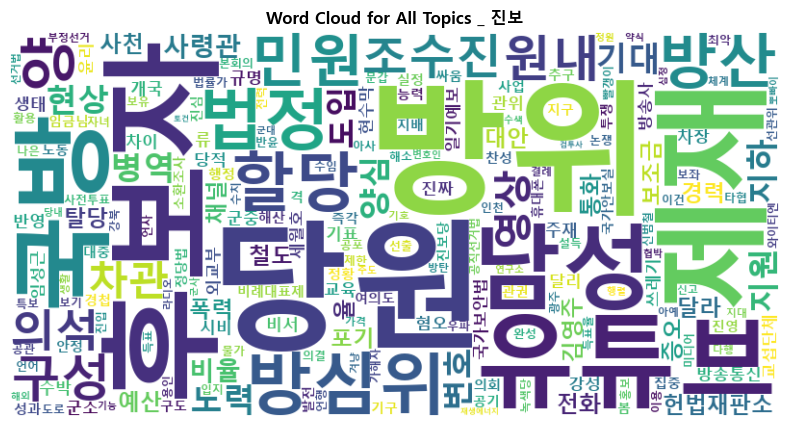

In [284]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(filtered_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Topics _ 진보")
plt.show()

In [285]:
exclude_words=["윤석열","선","의원","위원장","국민의힘","이재","더","대한","당","고"]+topics

In [286]:
# 전체 단어 빈도 계산 및 공통 단어 추출
all_word_freq = Counter()
topic_word_lists = []

for topic in topics:
    co_word_list = []
    for sentence in opinion_1["기사내용_process"]:
        if topic in sentence:
            co_word_list.extend([word for word in sentence if word != topic and word not in exclude_words])
    
    co_frequency = Counter(co_word_list)
    topic_word_lists.append(set(co_frequency.keys()))
    all_word_freq.update(co_frequency)
    print(f"'{topic}'와 함께 출현한 단어 빈도 상위 10개:", co_frequency.most_common(10))

# 공통 단어 추출
common_words = set.intersection(*topic_word_lists)

# 공통 단어와 제외할 단어를 필터링
filtered_frequencies = {word: freq for word, freq in all_word_freq.items() if word not in common_words and word not in exclude_words}

'대통령'와 함께 출현한 단어 빈도 상위 10개: [('사람', 122), ('이재명', 113), ('국민', 103), ('정부', 78), ('정권', 67), ('문제', 65), ('조국', 61), ('명', 54), ('대선', 53), ('야당', 50)]
'선거'와 함께 출현한 단어 빈도 상위 10개: [('국민', 122), ('사람', 122), ('이재명', 118), ('조국', 90), ('투표', 78), ('정부', 77), ('정권', 68), ('정당', 67), ('석', 64), ('문제', 63)]
'공천'와 함께 출현한 단어 빈도 상위 10개: [('이재명', 155), ('사람', 114), ('국민', 101), ('명', 95), ('경선', 77), ('변호사', 76), ('문제', 73), ('비례대표', 63), ('논란', 60), ('투표', 59)]
'민주당'와 함께 출현한 단어 빈도 상위 10개: [('이재명', 205), ('사람', 127), ('국민', 118), ('명', 109), ('변호사', 82), ('경선', 77), ('문제', 73), ('대선', 70), ('정부', 68), ('논란', 68)]
'후보'와 함께 출현한 단어 빈도 상위 10개: [('이재명', 175), ('국민', 130), ('사람', 124), ('명', 101), ('변호사', 90), ('투표', 81), ('비례대표', 72), ('조국', 69), ('논란', 69), ('대선', 69)]
'총선'와 함께 출현한 단어 빈도 상위 10개: [('이재명', 191), ('사람', 133), ('국민', 132), ('조국', 96), ('재판', 89), ('명', 85), ('문제', 77), ('투표', 73), ('정당', 70), ('비례대표', 70)]
'정치'와 함께 출현한 단어 빈도 상위 10개: [('이재명', 154), ('사람', 128), ('국민', 107), ('조국', 83), (

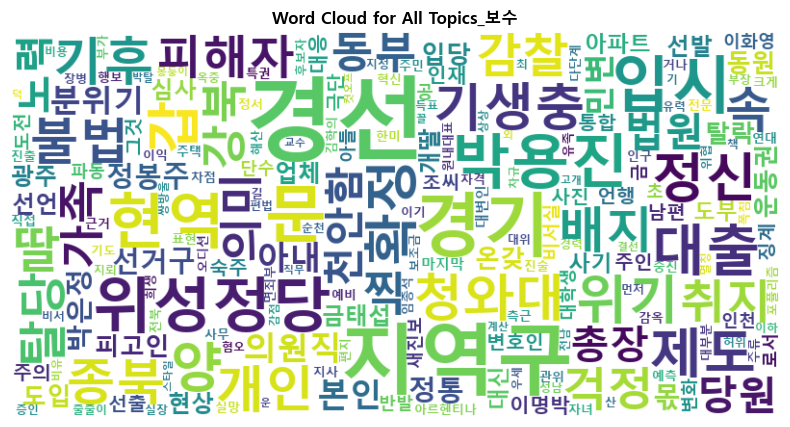

In [288]:
# 워드 클라우드 생성 및 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(filtered_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Topics_보수")
plt.show()